In [1]:
import numpy as np
from skimage import io
from glob import glob
import matplotlib.pyplot as plt
import pathlib
import os
import skimage
from skimage import morphology, measure
import torch
from peer_x import utils

from torchvision.utils import draw_segmentation_masks, make_grid
import torchvision.transforms.functional as F

%load_ext autoreload
%autoreload 2

/Users/gerome.vivar/Library/Caches/pypoetry/virtualenvs/peer-x-LR9O-BLx-py3.9/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Load post-processed outputs

In [2]:
image_dir = "../dataset/raw/MoNuSeg/images/"
model_output_dir = "../dataset/processed/MoNuSeg1000x1000/"

image_paths = glob(f"{os.path.join(image_dir, '*.png')}")
image_paths = np.sort(image_paths)
print(f"First n images {image_paths[:3]} \n")

output_paths = glob(f"{os.path.join(model_output_dir, '*.npz')}")
output_paths = np.sort(output_paths)
print(f"First n model outputs to be processed {output_paths[:3]}")

First n images ['../dataset/raw/MoNuSeg/images/TCGA-18-5592-01Z-00-DX1.png'
 '../dataset/raw/MoNuSeg/images/TCGA-21-5784-01Z-00-DX1.png'
 '../dataset/raw/MoNuSeg/images/TCGA-21-5786-01Z-00-DX1.png'] 

First n model outputs to be processed ['../dataset/processed/MoNuSeg1000x1000/TCGA-18-5592-01Z-00-DX1.npz'
 '../dataset/processed/MoNuSeg1000x1000/TCGA-21-5784-01Z-00-DX1.npz'
 '../dataset/processed/MoNuSeg1000x1000/TCGA-21-5786-01Z-00-DX1.npz']


### Plot segmentations

In [3]:
plt_list = []
num_instance_to_plot = 6
for k, v in enumerate(output_paths[:num_instance_to_plot]):
    cur_image = skimage.io.imread(image_paths[0])
    cur_output = np.load(v)
    input_ = torch.swapaxes(torch.tensor(cur_image), -1, 0)
    cur_res = draw_segmentation_masks(input_, torch.tensor(cur_output["masks"]), alpha=.7)
    plt_list.append(cur_res)

### Visualize individual plots

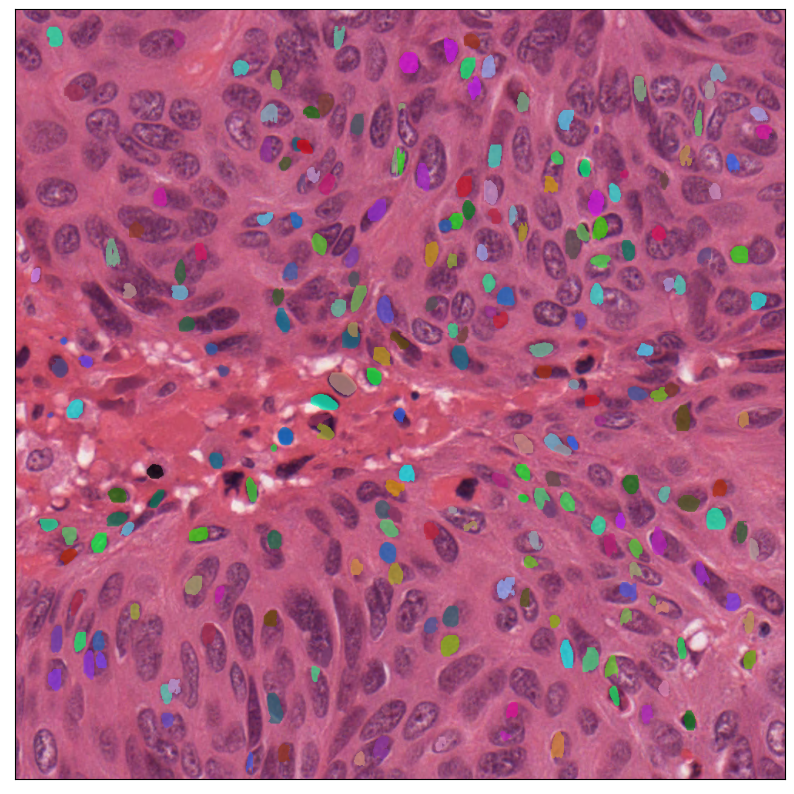

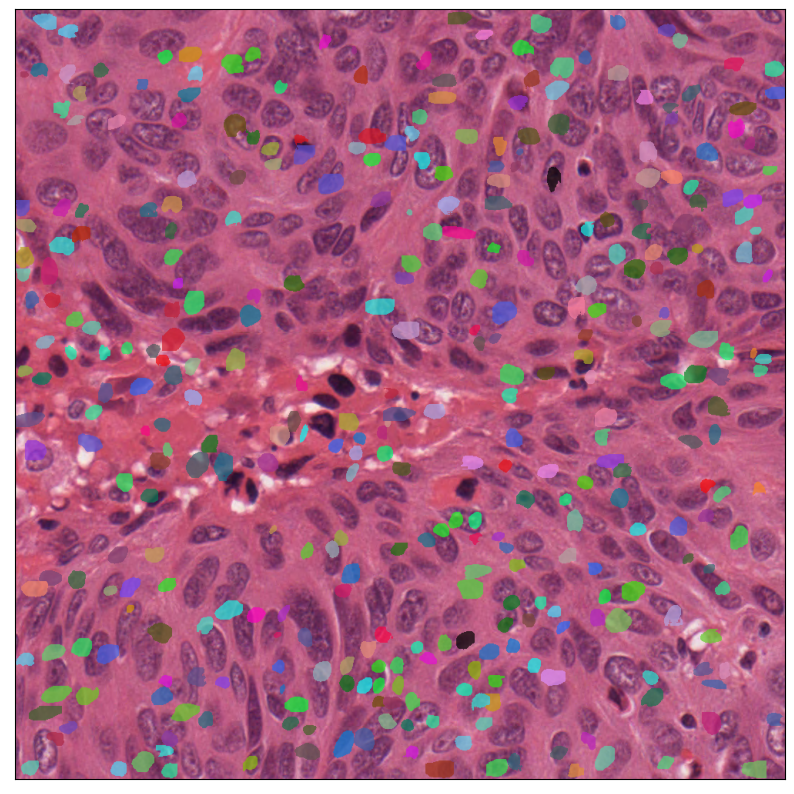

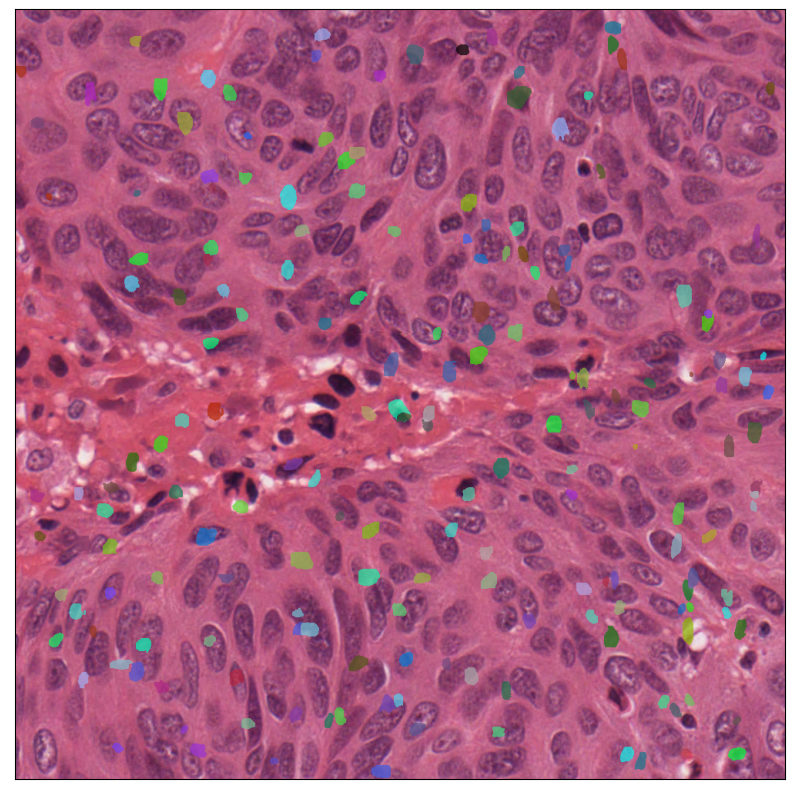

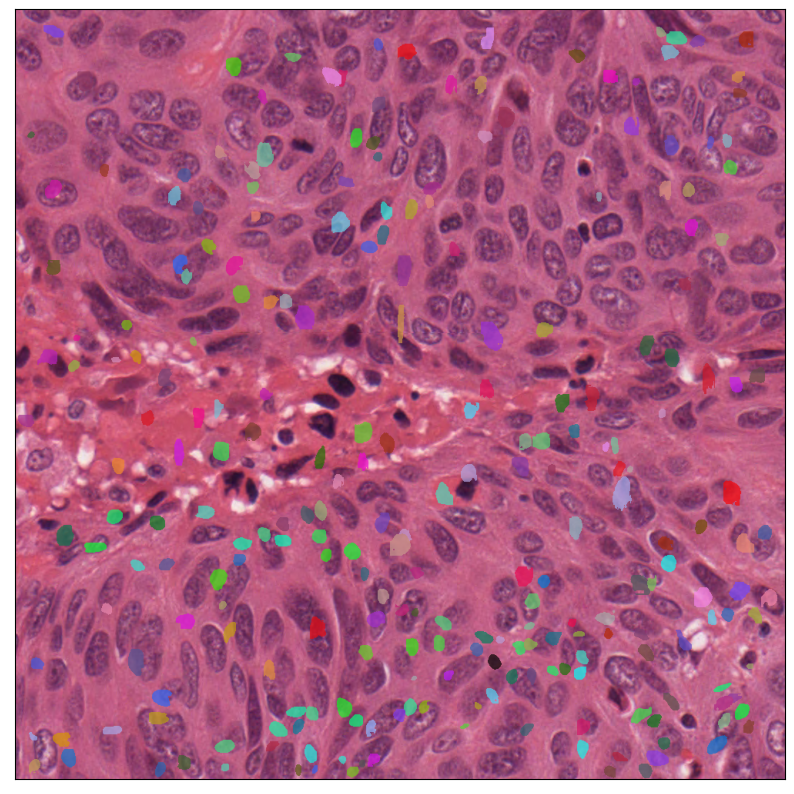

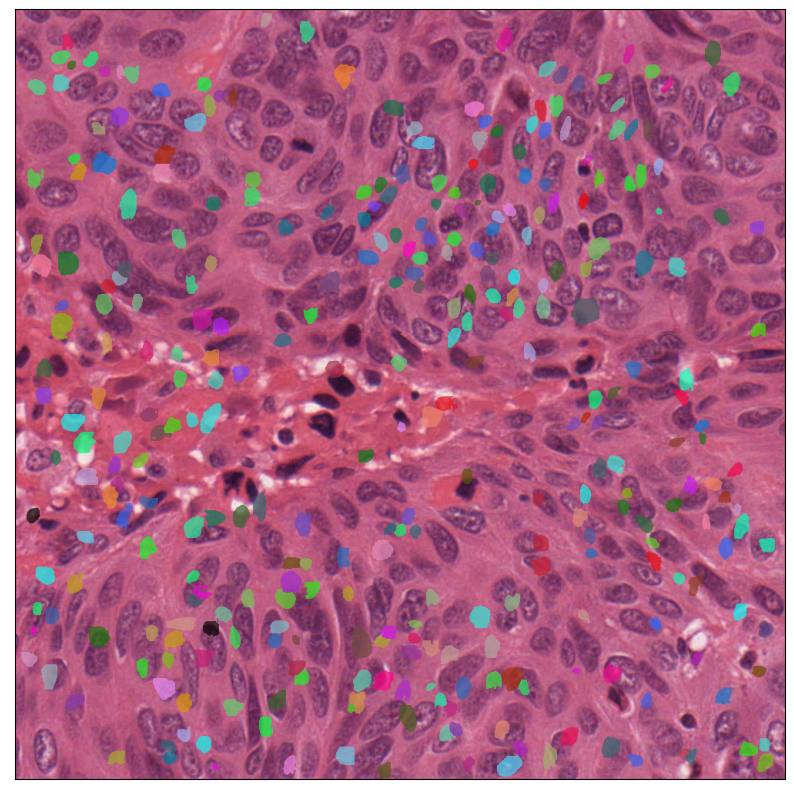

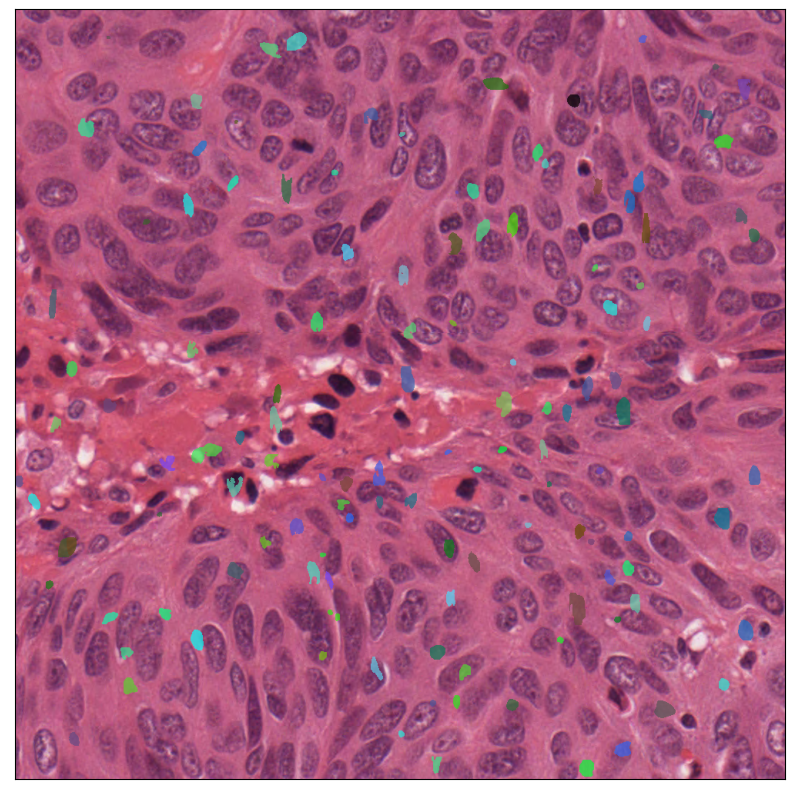

In [4]:
for i in plt_list:
    utils.show(i)

### Visualize plots as grid

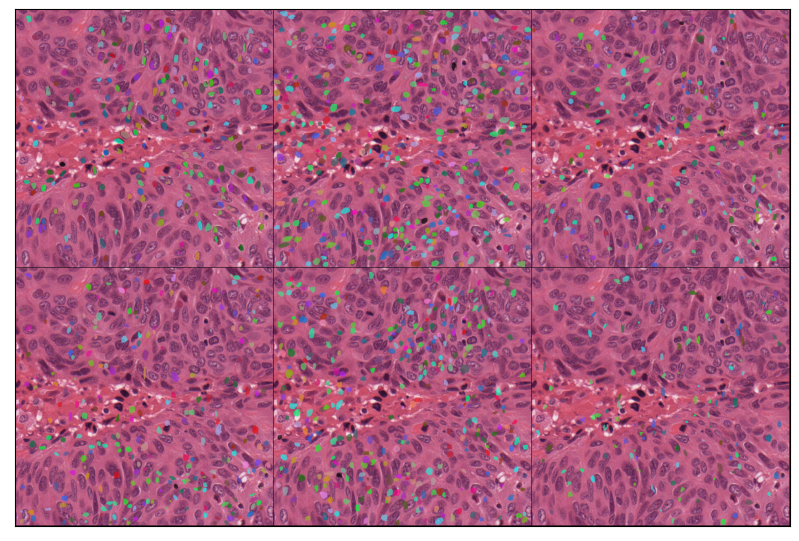

In [5]:
utils.show(make_grid(plt_list, nrow=3))